In [1]:
import pickle
import os
import pandas as pd
from googletrans import Translator
from langdetect import detect
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from IPython.display import Image,display,HTML

pd.options.display.max_columns=100
plt.style.use('ggplot')

In [2]:
df=pd.DataFrame()
for file in os.listdir('csv_files/airbnb_reviews/'):
    if file.endswith('pickle') and file!='translated_reviews_list.pickle':
        category_data=pd.DataFrame(pickle.load(open('csv_files/airbnb_reviews/'+file,'rb')))
        df=pd.concat([df,category_data],ignore_index=True)

In [3]:
df.sample(3)

,Category,Title,Image,Rating,Total Reviews,Location,Price,Reviews
2358,Historical homes,The windmill in Milos' port,https://a0.muscache.com/im/pictures/miso/Hosti...,4.99 ·,77 reviews,"Adamas, Greece",$145 $130 night,[Olivia|July 2023|We had a great time at the w...
2088,Earth homes,"Villa Vittoria, Stunning sea views & heated pool!",https://a0.muscache.com/im/pictures/miso/Hosti...,4.98 ·,44 reviews,"Heraklion, Crete, Greece",$952 $571 night,[Paul|June 2023|This was a great stay for my f...
3940,OMG!,Separate garden house surrounded by nature,https://a0.muscache.com/im/pictures/miso/Hosti...,4.86 ·,43 reviews,"Tervuren, Vlaams Gewest, Belgium",$151 night,"[Anis|April 2023|Kind and friendly hosts, inte..."


In [4]:
df['Rating']=df['Rating'].apply(lambda x:float(x.replace(' ·','')) if x is not None else None)

df['Total Reviews']=df['Total Reviews'].str.split('review').str[0].str.replace(',','').str.strip().astype(float)

df['Price']=df['Price'].apply(lambda x:x.split('night')[0].strip().split('$')[-1].replace(',','') if x is not None else None).astype(float)

df['Location']=df['Location'].apply(lambda x:x.split(',')[-1].strip() if x is not None else None)

#some items in reviews list are actuall review dates:
df['Reviews']=df['Reviews'].apply(lambda x:[i.split('|')[2] for i in x])
months_list = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df['Reviews'] = df['Reviews'].apply(lambda x: [None if (len([word for word in review.split()]) == 2 and any(word in months_list for word in review.split())) else review for review in x])

##### Translate non English comments 

In [ ]:
translator=Translator()

def translate_reviews(review):
    try:
        translated_review=translator.translate(review).text if detect(review)!='en' else review
        return translated_review
    except:
        return None
    
step_size=int(len(df['Reviews'])/100)
translated_reviews_list=[]
for i,reviews in enumerate(df['Reviews']):
    translated_reviews_list.append([translate_reviews(review) for review in reviews])
    if (i+1) % step_size==0:
        print(f'Progress {int((i+1)/len(df["Reviews"])*100)} %')

In [5]:
#pickle.dump(translated_reviews_list,open('csv_files/airbnb_reviews/translated_reviews_list.pickle','wb'))
translated_reviews_list=pickle.load(open('csv_files/airbnb_reviews/translated_reviews_list.pickle','rb'))
df['Reviews']=translated_reviews_list

In [6]:
df=df.drop_duplicates(subset=df.columns[1:-1])
df

,Category,Title,Image,Rating,Total Reviews,Location,Price,Reviews
0,Amazing pools,"The Villa Manzara, Luxury Villa In Kyrenia",https://a0.muscache.com/im/pictures/miso/Hosti...,5.00,6.0,Cyprus,385.0,[The villa is amazing just like the photos sho...
1,Amazing pools,Private Pool Seafront Villa - 4 Master Br,https://a0.muscache.com/im/pictures/e89267dc-5...,4.90,68.0,Cyprus,223.0,[This villa can be described as glorious. Mayb...
2,Amazing pools,Villa Liberty #22,https://a0.muscache.com/im/pictures/miso/Hosti...,5.00,16.0,Cyprus,192.0,"[Near to different beaches, shops. Very great ..."
3,Amazing pools,Protaras Holiday Villa TI39,https://a0.muscache.com/im/pictures/prohost-ap...,NaN,NaN,Cyprus,501.0,"[Beautiful villa, beach just across the street..."
4,Amazing pools,Seaside Emerald Villa,https://a0.muscache.com/im/pictures/miso/Hosti...,NaN,NaN,Cyprus,534.0,[]
...,...,...,...,...,...,...,...,...
4715,Tropical,Superior Room Garden View @ La Puerta Azul BF,https://a0.muscache.com/im/pictures/90dc1ec9-3...,4.79,120.0,Mexico,147.0,[Best place to stay in Holbox. The free breakf...
4716,Tropical,Breathtaking view to SJDS Bay | Rumba Suite #1,https://a0.muscache.com/im/pictures/6e4e5888-9...,4.84,61.0,Nicaragua,151.0,[I was with a friend and we had an amazing tim...
4717,Tropical,Petit Baie - Ocean Garden Gazebo,https://a0.muscache.com/im/pictures/68886332/f...,4.60,94.0,Seychelles,140.0,[They offered us a rental car with good price!...
4718,Tropical,Villa Paloma 4* - pool & ocean view - St-Leu,https://a0.muscache.com/im/pictures/miso/Hosti...,4.55,11.0,Réunion,298.0,"[great experience, good location, Great proper..."


In [ ]:
#df.explode('Reviews',ignore_index=True)

In [7]:
#df.to_csv('airbnb_reviews.csv',index=False)

##### Get sentiment scores from the reviews 

In [9]:
import nltk

from nltk.sentiment import SentimentIntensityAnalyzer
sia=SentimentIntensityAnalyzer()

from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

from nltk.corpus import stopwords
stopwords=stopwords.words('english')

In [10]:
def review_sentiment_scores(review):
    review_tokenized=nltk.word_tokenize(review)
    review_lower=[w.lower() for w in review_tokenized]
    review_lemmatized=[lemmatizer.lemmatize(w) for w in review_lower]
    review_filtered=[w for w in review_lemmatized if w not in stopwords]
    final_review=' '.join(review_filtered)
    
    score=sia.polarity_scores(final_review)['compound']
    return score

In [11]:
%%time
step_size=int(len(df['Reviews'])/100)
scores_list = []

for i,reviews in enumerate(df['Reviews']):
    if isinstance(reviews, list):
        scores_list.append([review_sentiment_scores(review) if review else 0 for review in reviews])
        if (i+1) % step_size==0:
            print(f'Progress {int((i+1)/len(df["Reviews"])*100)} %')
            
df['Compound Sentiment Score']=scores_list

Progress 0 %
Progress 1 %
Progress 2 %
Progress 3 %
Progress 4 %
Progress 5 %
Progress 6 %
Progress 7 %
Progress 8 %
Progress 9 %
Progress 10 %
Progress 11 %
Progress 12 %
Progress 13 %
Progress 14 %
Progress 15 %
Progress 16 %
Progress 17 %
Progress 18 %
Progress 19 %
Progress 20 %
Progress 21 %
Progress 22 %
Progress 23 %
Progress 24 %
Progress 25 %
Progress 26 %
Progress 27 %
Progress 28 %
Progress 29 %
Progress 30 %
Progress 31 %
Progress 32 %
Progress 33 %
Progress 34 %
Progress 35 %
Progress 36 %
Progress 37 %
Progress 38 %
Progress 39 %
Progress 40 %
Progress 41 %
Progress 42 %
Progress 43 %
Progress 44 %
Progress 45 %
Progress 46 %
Progress 47 %
Progress 48 %
Progress 49 %
Progress 50 %
Progress 51 %
Progress 52 %
Progress 53 %
Progress 54 %
Progress 55 %
Progress 56 %
Progress 57 %
Progress 58 %
Progress 59 %
Progress 60 %
Progress 61 %
Progress 62 %
Progress 63 %
Progress 64 %
Progress 65 %
Progress 66 %
Progress 67 %
Progress 68 %
Progress 69 %
Progress 70 %
Progress 71 %
Pr

In [12]:
df['Mean']=df['Compound Sentiment Score'].apply(lambda x:np.mean(x) if isinstance(x,list) else None)
df['STD']=df['Compound Sentiment Score'].apply(lambda x:np.std(x) if isinstance(x,list) else None)
df['n']=df['Compound Sentiment Score'].apply(lambda x:len(x) if isinstance(x,list) else None)

C:\Users\berid\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\berid\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [13]:
df.columns

Index(['Category', 'Title', 'Image', 'Rating', 'Total Reviews', 'Location',
       'Price', 'Reviews', 'Compound Sentiment Score', 'Mean', 'STD', 'n'],
      dtype='object')

In [14]:
t_scores_95ci = {
    1: 12.706,
    2: 4.303,
    3: 3.182,
    4: 2.776,
    5: 2.571,
    6: 2.447
}

moe=df.apply(lambda x:x['STD']*\
(x['n']**0.5) if x['n']>1 else None,axis=1)*df.apply(lambda x:t_scores_95ci[x['n']-1] if x['n']>1 else None,axis=1)
low=df['Mean']-moe
high=df['Mean']+moe

result = [[round(l, 2), round(h, 2)] if all([not np.isnan(l), not np.isnan(h)]) else None for l, h in zip(low, high)]
df['95CI']=result

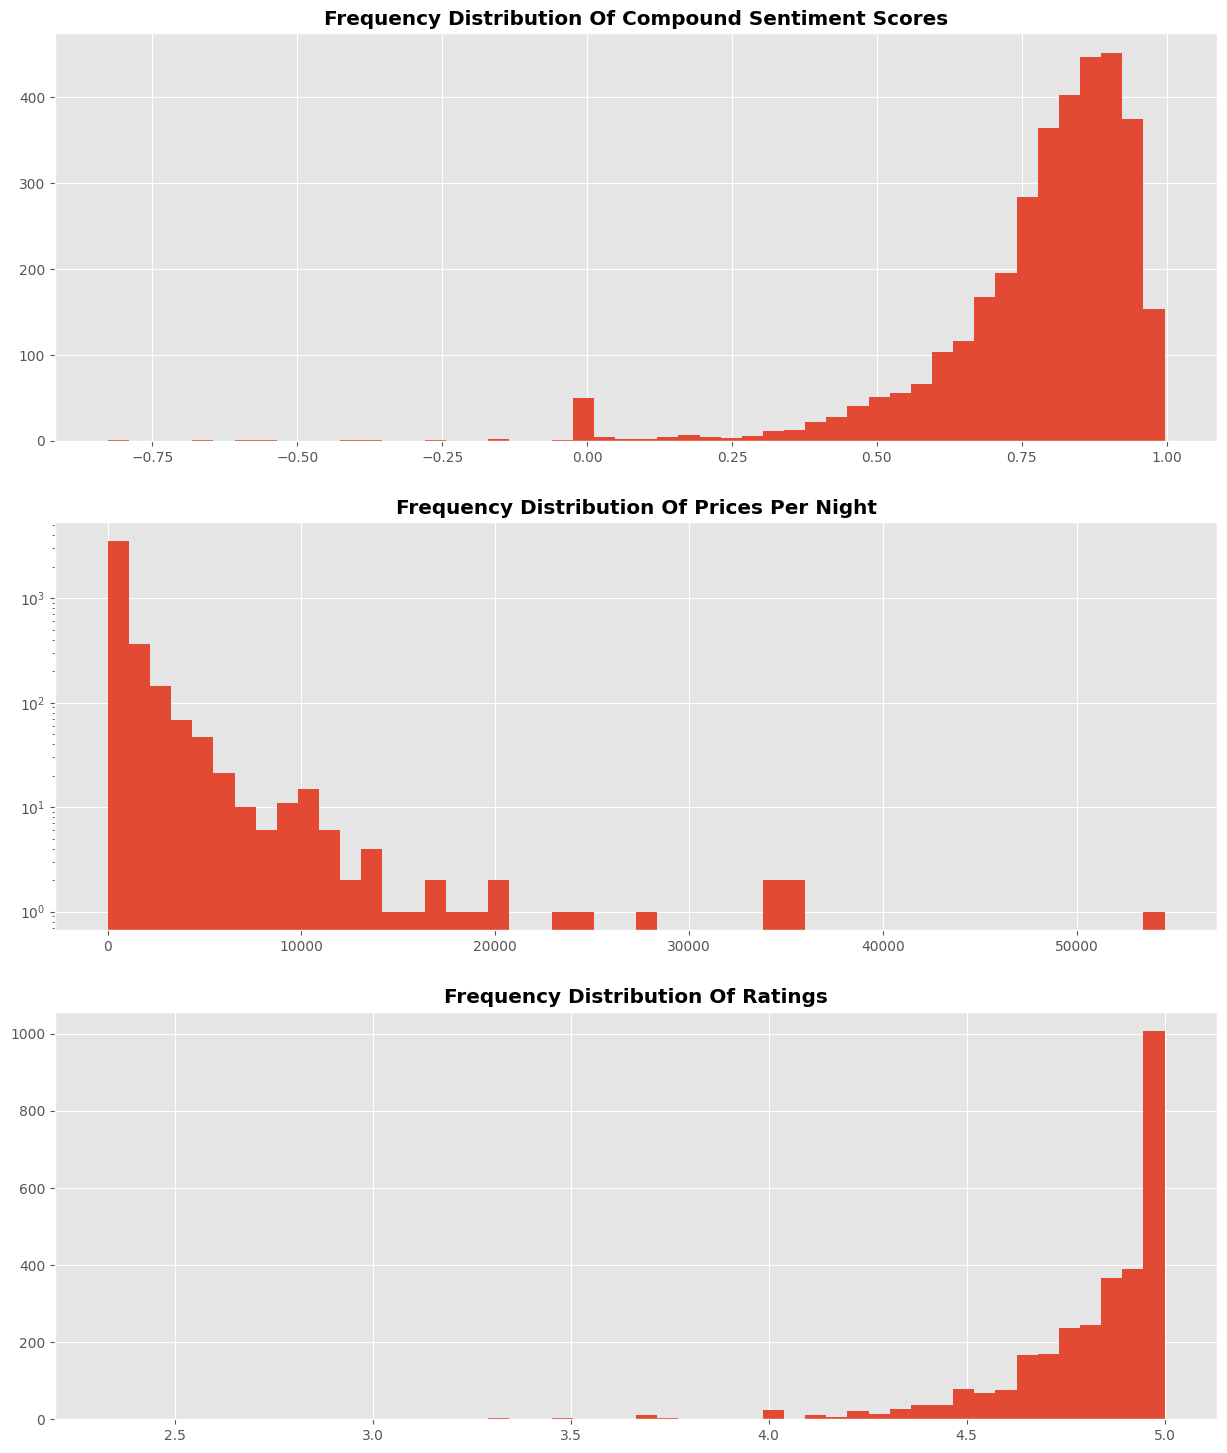

In [15]:
fig,(ax1,ax2,ax3)=plt.subplots(3,1,figsize=(15,18))

df['Mean'].hist(bins=50,ax=ax1)
ax1.set_title('Frequency Distribution Of Compound Sentiment Scores',fontweight='bold')

df['Price'].hist(bins=50,ax=ax2)
ax2.set_title('Frequency Distribution Of Prices Per Night',fontweight='bold')
ax2.set_yscale('log')

df['Rating'].hist(bins=50,ax=ax3)
ax3.set_title('Frequency Distribution Of Ratings',fontweight='bold')

plt.show()

##### Top 10 airbnb properties by sentiment score 

In [16]:
top_reviews=df.query('n>=6').sort_values('Mean',ascending=False).head(10)[['Image','Title','Category','Location','Price']]
top_reviews['Image'] = top_reviews.apply(lambda x: f'<img src="{x["Image"]}" style="max-height:300px;max-width:300px;">', axis=1)
top_reviews['Price']=top_reviews['Price'].apply(lambda x:"${:,.0f}".format(x))
top_reviews.rename(columns={'Price':'Price Per Night'},inplace=True)
top_reviews=top_reviews.reset_index(drop=True)
display(HTML(top_reviews.to_html(escape=False)))

,Image,Title,Category,Location,Price Per Night
0,,Original archipelago experience,Islands,Sweden,$115
1,,"Fab views by the sea! Sunset, sunrise & sauna.",Islands,Sweden,$519
2,,Luxury flat with Sea & Mountain views,Amazing pools,Cyprus,$73
3,,Summer house at Malö currents,OMG!,Sweden,$327
4,,OLD PRESBYTERY - 17th Century,Trending,France,$946
5,,Myrsini's Castle House - Residence Balcony & View,Historical homes,Greece,$362
6,,Modern Cabin w/Hot Tub & Fire Pit!,New,United States,$222
7,,Jungle Treehouse in Punta Sayulita,OMG!,Mexico,"$1,400"
8,,THE CALYPSO HOUSE,Design,Greece,"$1,780"
9,,Luxury Villa in Urubamba Sacred Valley/Cusco,Trending,Peru,$295


##### Top 10 most expensive airbnb properties 

In [17]:
# 10 Most Expensive Properties

top_10=df.sort_values('Price',ascending=False).head(10)[['Image','Title','Category','Location','Price']]
top_10['Image'] = top_10.apply(lambda x: f'<img src="{x["Image"]}" style="max-height:300px;max-width:300px;">', axis=1)
top_10['Price']=top_10['Price'].apply(lambda x:"${:,.0f}".format(x))
top_10.rename(columns={'Price':'Price Per Night'},inplace=True)
top_10=top_10.reset_index(drop=True)
display(HTML(top_10.to_html(escape=False)))

,Image,Title,Category,Location,Price Per Night
0,,Alpine Estate,Luxe,Switzerland,"$54,535"
1,,Emerald Cay,Tropical,Turks & Caicos Islands,"$35,714"
2,,Privat Island in Ibiza,Islands,Spain,"$35,046"
3,,Villa Syrene,Mansions,Italy,"$34,768"
4,,Villa Syrene,Luxe,Italy,"$34,767"
5,,Ibi001 - Luxury private island in Ibiza,Islands,Spain,"$27,500"
6,,The Aerial,Tropical,British Virgin Islands,"$25,000"
7,,Cove Spring House,Tropical,Barbados,"$24,000"
8,,38 m Luxurious Motor yacht in Turkey,Boats,Turkey,"$20,583"
9,,Borgo Finocchieto - Full property,Luxe,Italy,"$20,582"


##### Top 10 cheapest airbnb properties 

In [18]:
bottom_10=df.sort_values('Price',ascending=True).head(10)[['Image','Title','Category','Location','Price']]
bottom_10['Image'] = bottom_10.apply(lambda x: f'<img src="{x["Image"]}" style="max-height:300px;max-width:300px;">', axis=1)
bottom_10['Price']=bottom_10['Price'].apply(lambda x:"${:,.0f}".format(x))
bottom_10.rename(columns={'Price':'Price Per Night'},inplace=True)
bottom_10=bottom_10.reset_index(drop=True)
display(HTML(bottom_10.to_html(escape=False)))

,Image,Title,Category,Location,Price Per Night
0,,Relaxing is waiting for you to finish booking.,Countryside,Georgia,$9
1,,Kochki's Cozy House,Countryside,Georgia,$10
2,,I R K O,Countryside,Georgia,$10
3,,TUC - Tourism Unique Center,Countryside,Armenia,$10
4,,Motor yacht in ören gökova marina,Boats,Turkey,$10
5,,Icho House,Amazing views,Georgia,$12
6,,Mukhuri GuestHouse Room#1,Countryside,Georgia,$12
7,,Mukhuri GuestHouse Room#2,Countryside,Georgia,$12
8,,Shio's stonehouse in Tusheti,Countryside,Georgia,$13
9,,Ruispiri Biodynamic Vineyard,Countryside,Georgia,$13


##### Highest rated airbnb properties

In [19]:
top_ratings=df.query('`Total Reviews`>100 and Rating==5').sort_values('Rating',ascending=False)[['Image','Title','Category','Location','Price','Rating']]
top_ratings['Image'] = top_ratings.apply(lambda x: f'<img src="{x["Image"]}" style="max-height:300px;max-width:300px;">', axis=1)
top_ratings['Price']=top_ratings['Price'].apply(lambda x:"${:,.0f}".format(x))
top_ratings.rename(columns={'Price':'Price Per Night'},inplace=True)
top_ratings=top_ratings.reset_index(drop=True)
display(HTML(top_ratings.to_html(escape=False)))

,Image,Title,Category,Location,Price Per Night,Rating
0,,Susanna's wonderful mansion with its own lake,Mansions,Sweden,"$1,151",5.0
1,,"""Air Castle Treehouse""",OMG!,United States,$350,5.0
2,,Alchemy - Earth & Sky Dwellings,OMG!,United States,$400,5.0
3,,The Silo at Oak Hill Farm *Outdoor Claw Foot Tub*,OMG!,United States,$143,5.0
4,,Black's Hut - Lakefront Cottage,Trending,New Zealand,$308,5.0
5,,"L'Orée des Bauges, small cottage facing the mountains",Trending,France,$89,5.0
6,,"Tiny House Cozy Cabin by Zion, Grand Canyon, Bryce",Trending,United States,$111,5.0
7,,Vineyard Vacation Rental,Trending,Canada,$200,5.0
8,,Windmill Manor at Sunnyburn Farm,Trending,United States,$703,5.0
9,,The A-frame at Creekside Dwellings ((hot tub)),Trending,United States,$199,5.0


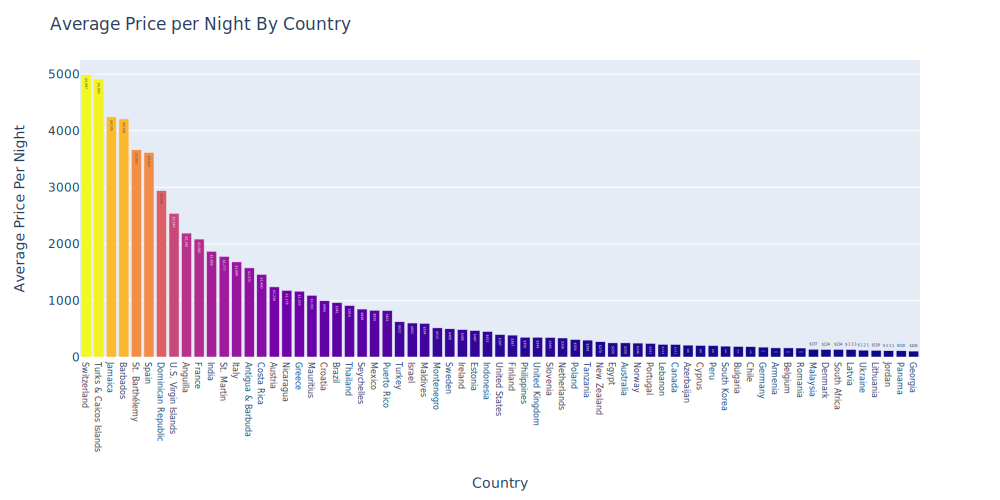

In [20]:
g=df.groupby('Location').filter(lambda x:x['Title'].count()>2).groupby('Location')['Price'].mean().sort_values(ascending=False)

fig=px.bar(x=g.index,y=g.values,text=["${:,.0f}".format(x) for x in g.values],color=g.values,color_continuous_scale='plasma')
fig.update_layout(title=dict(text='Average Price per Night By Country',font_family='Arial Black'))
fig.update_layout(height=500,width=1000)
fig.update_xaxes(title_text='Country',tickfont=dict(size=8,family='Arial Black'))
fig.update_yaxes(title_text='Average Price Per Night')
fig.update_coloraxes(showscale=False)
fig.show('svg')

##### Best offers for price? 

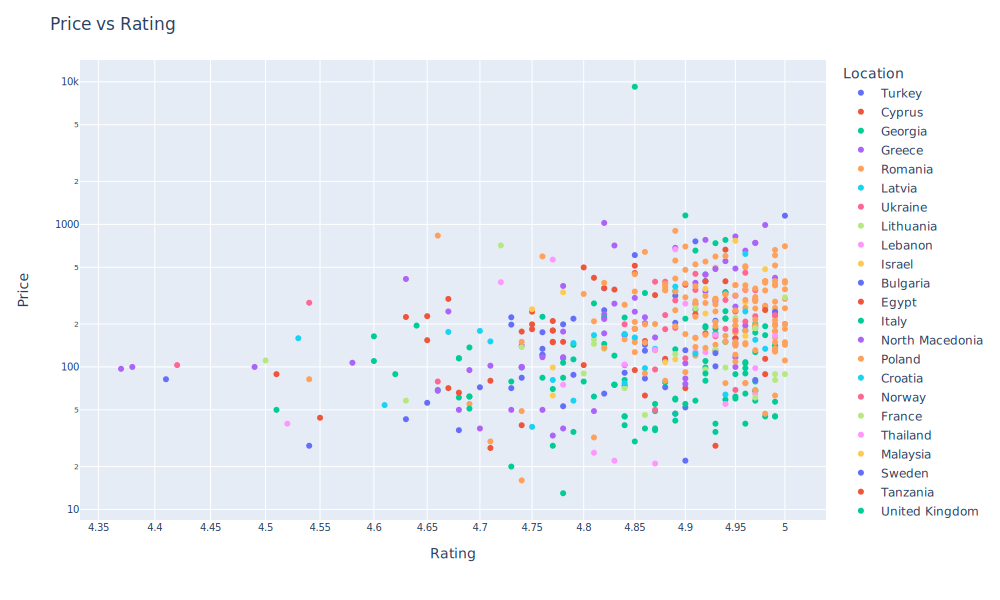

In [21]:
fig=px.scatter(df.query('`Total Reviews`>100'),x='Rating',y='Price',color='Location',hover_name='Title',
           log_x=True,log_y=True)
fig.update_layout(title=dict(text='Price vs Rating',font_family='Arial Black'))
fig.update_layout(height=600,width=1000)
fig.update_xaxes(tickfont=dict(size=10,family='Arial Black'))
fig.update_yaxes(tickfont=dict(size=10,family='Arial Black'))
fig.show('svg')